# Importing the relevant libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Loading the raw data

In [2]:
# loading dataset 
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

<h3>Exploring the descriptive statistics of the variables </h3>

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'], axis=1)

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

In [6]:
# checking the null values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# null values are less then 5% so we can remove them
data_no_mv = data.dropna(axis=0)

# Exploring the PDFs

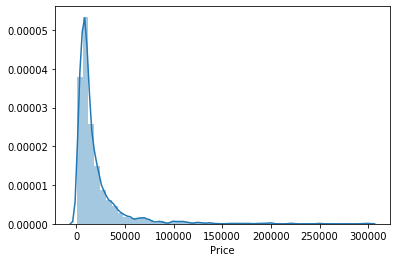

In [8]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

# Dealing with outliers

In [9]:
# Obviously there are some outliers present 

# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for Ordinary Least Square (OLS), thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]

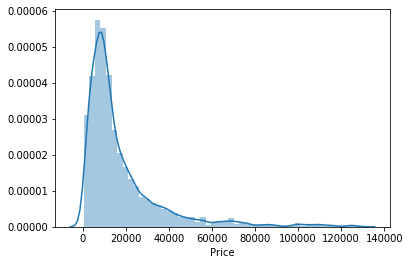

In [10]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

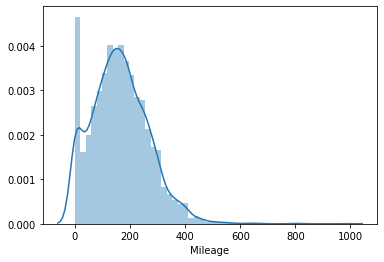

In [11]:
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

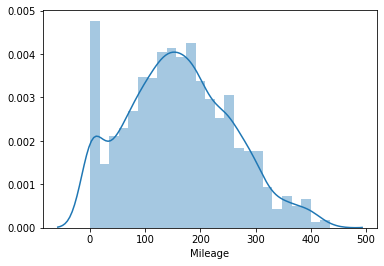

In [13]:
sns.distplot(data_2['Mileage'])

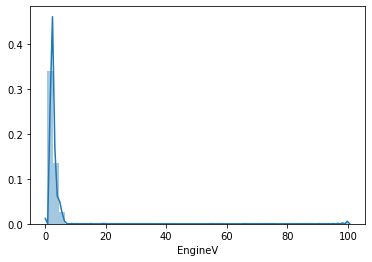

In [14]:
sns.distplot(data_no_mv['EngineV'])

In [15]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75

# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

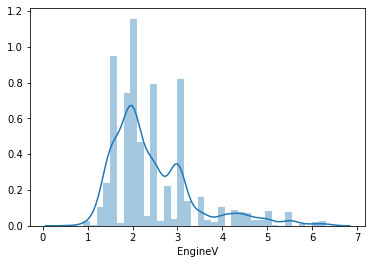

In [17]:
sns.distplot(data_3['EngineV'])

In [18]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this prediction we won't consider it as categorical, but that's yet something else we may try on later

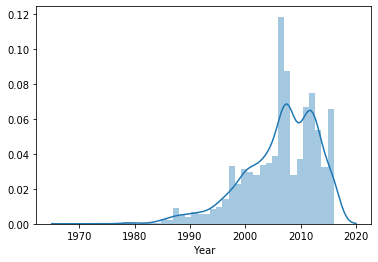

In [19]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
sns.distplot(data_no_mv['Year'])

In [20]:
# However, the outliers are on the low end in the 'Year'. It seems we have vintage cars
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

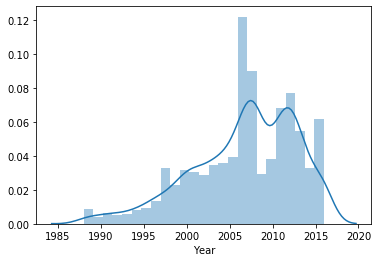

In [21]:
# Here's the new result
sns.distplot(data_4['Year'])

In [22]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it.

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [23]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

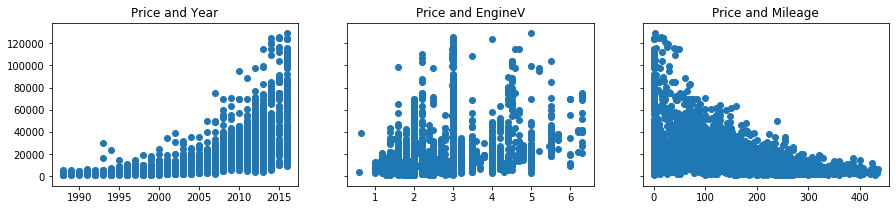

In [24]:
# we can simply use plt.scatter() for each of them (Price and Year, Price and EngineV , Price and Mileage)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3)) # sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

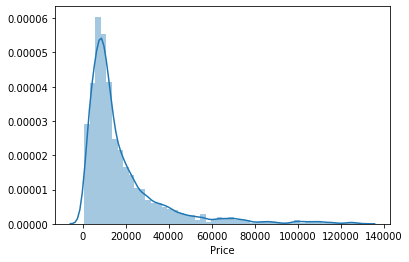

In [25]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

# Relaxing the assumptions

In [26]:
# Transforming the 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Adding the log_price to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


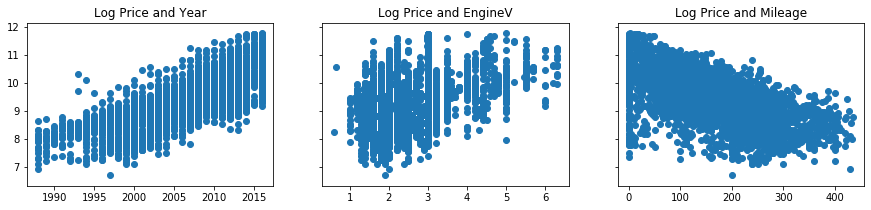

In [27]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [28]:
# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [29]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned= data_cleaned.drop(['Price'], axis=1)

# Multicollinearity

In [30]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [31]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [32]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

In [33]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [34]:
# Let's explore the result
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [35]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
# data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity = data_cleaned.drop(['EngineV'],axis=1)

## Create dummy variables

In [36]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [37]:
# Here's the result
data_with_dummies.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearranging the columns

In [38]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [39]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']

In [40]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model


<h3> Declare the inputs and the targets </h3>

In [41]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'], axis=1)

## Train Test Split

In [42]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 42
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [43]:
print(x_train)

      Mileage  Year  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
2179      149  2008          0                    0                 0   
416       147  2001          1                    0                 0   
3023      113  2007          0                    0                 1   
217        91  2008          0                    0                 0   
888       184  2007          0                    0                 0   
...       ...   ...        ...                  ...               ...   
1130      176  2005          0                    0                 0   
1294        1  2014          1                    0                 0   
860        65  2013          1                    0                 0   
3507      148  2008          0                    0                 1   
3174      198  2004          0                    1                 0   

      Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch  Body_other  \
2179              0             0           

In [44]:
print(y_train)

2179     9.409109
416      8.575462
3023     8.853523
217      8.974618
888      9.047821
          ...    
1130     9.148465
1294    11.261601
860     10.419301
3507     8.909235
3174     9.323669
Name: log_price, Length: 3093, dtype: float64


In [45]:
print(x_test)

      Mileage  Year  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
2174      190  2007          0                    1                 0   
1420      170  2005          0                    0                 0   
2478      250  2002          0                    1                 0   
1584       81  2012          0                    0                 0   
952       314  1993          0                    0                 0   
...       ...   ...        ...                  ...               ...   
2683      215  2003          0                    0                 0   
1159      105  2008          0                    0                 1   
2447      300  1998          0                    0                 0   
2458      105  2013          0                    0                 0   
691       240  2007          0                    0                 0   

      Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch  Body_other  \
2174              0             0           

In [46]:
print(y_test)

2174     9.966462
1420     9.093807
2478     8.086410
1584     9.392662
952      8.594154
          ...    
2683     8.342840
1159     9.082507
2447     8.486734
2458    10.203592
691      9.296518
Name: log_price, Length: 774, dtype: float64


# Featuring Scaling

In [47]:
# importing the scaling module
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
# scale the features and store them in a new variable (the actual scaling procedure)
x_train_scaled =  scaler.transform(x_train)

In [49]:
print(x_train_scaled)

[[-0.11319672  0.20221874 -0.43912053 ... -0.15871543 -0.76030338
   0.3167336 ]
 [-0.13427354 -0.95482091  2.27727908 ... -0.15871543 -0.76030338
  -3.15722744]
 [-0.49257935  0.03692737 -0.43912053 ... -0.15871543  1.31526445
   0.3167336 ]
 ...
 [-0.99842285  1.02867564  2.27727908 ... -0.15871543  1.31526445
   0.3167336 ]
 [-0.12373513  0.20221874 -0.43912053 ... -0.15871543  1.31526445
   0.3167336 ]
 [ 0.40318518 -0.45894677 -0.43912053 ... -0.15871543  1.31526445
   0.3167336 ]]


In [50]:
x_test_scaled = scaler.transform(x_test)

In [51]:
print(x_test_scaled)

[[ 0.31887793  0.03692737 -0.43912053 ... -0.15871543  1.31526445
   0.3167336 ]
 [ 0.10810981 -0.29365539 -0.43912053 ... -0.15871543 -0.76030338
   0.3167336 ]
 [ 0.9511823  -0.78952953 -0.43912053 ... -0.15871543 -0.76030338
  -3.15722744]
 ...
 [ 1.47810261 -1.45069504 -0.43912053 ... -0.15871543 -0.76030338
   0.3167336 ]
 [-0.5768866   1.02867564 -0.43912053 ... -0.15871543 -0.76030338
   0.3167336 ]
 [ 0.84579824  0.03692737 -0.43912053 ... -0.15871543 -0.76030338
   0.3167336 ]]


## Create the Regression

In [52]:
# create al linear regression object
regressor = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
regressor.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = regressor.predict(x_train_scaled)

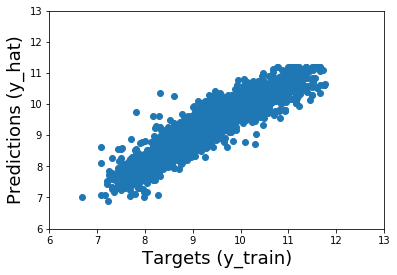

In [54]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

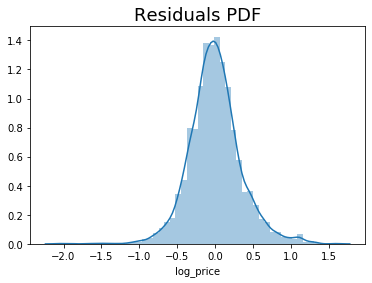

In [55]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [56]:
# Find the R-squared of the model
regressor.score(x_train_scaled,y_train)


0.8432701850872923

# Formula for Adjusted R^2

$R^2_{adj.} = 1 -(1-R^2) * \frac{n-1}{n-p-1}$


In [57]:
def adj_Rsquared(x, y):
    r2 = regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    r2_adj = 1 - (1 - r2) * (n-1)/(n-p-1)
    return r2_adj

In [58]:
# Find the Adjusted R-squared of the model
r2_adj = adj_Rsquared(x_train_scaled,y_train)
r2_adj

0.8424037113137912

### Finding the weights and bias

In [59]:
# obtain the bias (intercept) of the regression
regressor.intercept_

9.429081845596073

In [60]:
# obtain the weights (coefficients) of the regression
regressor.coef_

array([-0.10729573,  0.49030777,  0.03047016,  0.02632397, -0.17244002,
       -0.25704058, -0.08835631, -0.15954048, -0.17903992, -0.11671607,
       -0.22218972, -0.15524594, -0.22438075, -0.0305797 , -0.009584  ,
       -0.03886615,  0.26033774])

In [61]:
inputs.head()

,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [62]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = regressor.coef_
reg_summary

,Features,Weights
0,Mileage,-0.107296
1,Year,0.490308
2,Brand_BMW,0.030470
3,Brand_Mercedes-Benz,0.026324
4,Brand_Mitsubishi,-0.172440
5,Brand_Renault,-0.257041
6,Brand_Toyota,-0.088356
7,Brand_Volkswagen,-0.159540
8,Body_hatch,-0.179040
9,Body_other,-0.116716


In [63]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [64]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test_scaled', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted

In [65]:
y_hat_test = regressor.predict(x_test_scaled)

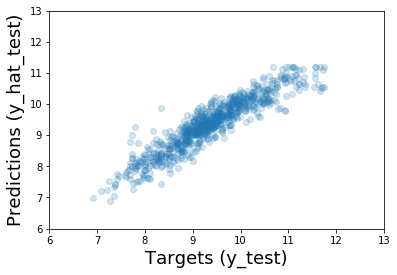

In [66]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [67]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,25925.703338
1,5362.526754
2,4484.964489
3,11411.230703
4,3362.171518


In [68]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,25925.703338,4200.0
1,5362.526754,NaN
2,4484.964489,NaN
3,11411.230703,NaN
4,3362.171518,NaN
...,...,...
769,4378.458167,NaN
770,9518.767883,NaN
771,4449.039745,NaN
772,24448.466186,NaN


In [69]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [70]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,25925.703338,21300.0
1,5362.526754,8900.0
2,4484.964489,3250.0
3,11411.230703,12000.0
4,3362.171518,5400.0
...,...,...
769,4378.458167,4200.0
770,9518.767883,8800.0
771,4449.039745,4850.0
772,24448.466186,27000.0


In [71]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [72]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,25925.703338,21300.0,-4625.703338,21.716917
1,5362.526754,8900.0,3537.473246,39.746890
2,4484.964489,3250.0,-1234.964489,37.998907
3,11411.230703,12000.0,588.769297,4.906411
4,3362.171518,5400.0,2037.828482,37.737564
...,...,...,...,...
769,4378.458167,4200.0,-178.458167,4.249004
770,9518.767883,8800.0,-718.767883,8.167817
771,4449.039745,4850.0,400.960255,8.267222
772,24448.466186,27000.0,2551.533814,9.450125


In [73]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16344.623009,17799.988992,1455.365983,27.152310
std,13978.658840,19723.434542,10703.512314,29.622185
min,970.273659,999.000000,-30275.924292,0.004065
25%,6603.912867,6700.000000,-2356.038261,9.514207
50%,12052.238575,11050.000000,-113.986079,20.516420
75%,21649.859190,20475.000000,1917.166184,36.280154
max,73439.174292,125000.000000,86519.082657,360.820737


In [74]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
40,23500.96,23500.00,-0.96,0.00
352,6999.24,7000.00,0.76,0.01
302,19502.57,19500.00,-2.57,0.01
701,7798.89,7800.00,1.11,0.01
398,9498.30,9500.00,1.70,0.02
197,11789.36,11800.00,10.64,0.09
604,10112.90,10100.00,-12.90,0.13
415,10013.13,10000.00,-13.13,0.13
186,3505.39,3500.00,-5.39,0.15
213,51420.03,51500.00,79.97,0.16
